In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_table("/Volumes/Macintosh HD/Data/glove.6B/glove.6B.50d.txt", delimiter=" ", header=None, index_col=0, quoting=3)

In [3]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
0,,,,,,,,,,,,,,,,,,,,,
the,0.418000,0.249680,-0.41242,0.12170,0.34527,-0.044457,-0.49688,-0.17862,-0.00066,-0.656600,...,-0.298710,-0.157490,-0.347580,-0.045637,-0.44251,0.187850,0.002785,-0.184110,-0.115140,-0.78581
",",0.013441,0.236820,-0.16899,0.40951,0.63812,0.477090,-0.42852,-0.55641,-0.36400,-0.239380,...,-0.080262,0.630030,0.321110,-0.467650,0.22786,0.360340,-0.378180,-0.566570,0.044691,0.30392
.,0.151640,0.301770,-0.16763,0.17684,0.31719,0.339730,-0.43478,-0.31086,-0.44999,-0.294860,...,-0.000064,0.068987,0.087939,-0.102850,-0.13931,0.223140,-0.080803,-0.356520,0.016413,0.10216
of,0.708530,0.570880,-0.47160,0.18048,0.54449,0.726030,0.18157,-0.52393,0.10381,-0.175660,...,-0.347270,0.284830,0.075693,-0.062178,-0.38988,0.229020,-0.216170,-0.225620,-0.093918,-0.80375
to,0.680470,-0.039263,0.30186,-0.17792,0.42962,0.032246,-0.41376,0.13228,-0.29847,-0.085253,...,-0.094375,0.018324,0.210480,-0.030880,-0.19722,0.082279,-0.094340,-0.073297,-0.064699,-0.26044


In [4]:
words = set(df.index)

In [7]:
"daniel" in words

True

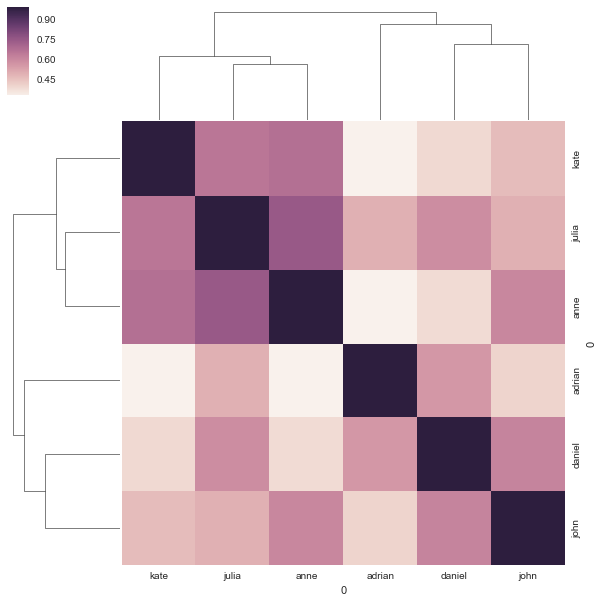

In [8]:
sns.clustermap(df.loc[["daniel", "adrian", "john", "kate", "julia", "anne"]].transpose().corr())

/usr/local/lib/python3.4/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


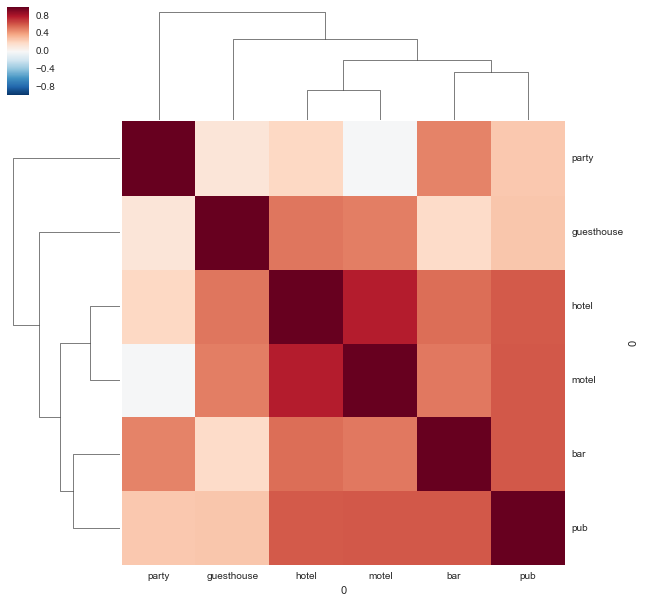

In [10]:
sns.clustermap(df.loc[["hotel", "motel", "guesthouse", "bar", "pub", "party"]].transpose().corr())

In [11]:
np.dot(df.loc["kate"],  df.loc["he"] - df.loc["she"])

-6.5869068840070009

In [12]:
np.dot(df.loc["john"],  df.loc["he"] - df.loc["she"])

2.5265921501259196

In [19]:
names = ["kate", "catherine", "john", "mark", "peter", "anna", "julia", "jacob", "jake",
         "richard", "ted", "theodore", "sue", "susanne", "suzanne", "susan", "mary",
         "leo", "leonard", "alexander", "alexandra", "alex", "sasha"]
all([name in words for name in names])

True

In [20]:
gender = df.loc["he"] - df.loc["she"]

In [21]:
df.loc[names].dot(gender).sort_values()

0
anna        -7.344199
kate        -6.586907
susan       -5.699029
julia       -5.126295
mary        -4.743954
sasha       -4.371697
catherine   -4.177077
alexandra   -4.109371
suzanne     -3.833959
sue         -2.976699
susanne     -2.352316
jake        -1.061410
alex        -0.501445
ted         -0.465928
leonard      0.742049
peter        0.865114
jacob        0.987405
richard      1.340372
leo          2.063482
mark         2.316420
alexander    2.471270
theodore     2.525033
john         2.526592
dtype: float64

In [22]:
diminutive = df.loc["kate"] - df.loc["catherine"]

In [30]:
proj = pd.DataFrame([gender, diminutive], index=["gender", "diminutive"]).transpose()

In [34]:
df_plot = df.loc[names].dot(proj).sort_values(by="diminutive")
df_plot

,gender,diminutive
0,,
catherine,-4.177077,-7.004076
alexander,2.471270,-4.733500
alexandra,-4.109371,-4.541007
theodore,2.525033,-3.765326
leo,2.063482,-3.650150
mary,-4.743954,-3.394519
peter,0.865114,-2.686588
suzanne,-3.833959,-2.250602
john,2.526592,-2.064688


In [35]:
df_plot["name"] = df_plot.index

In [36]:
%load_ext rpy2.ipython

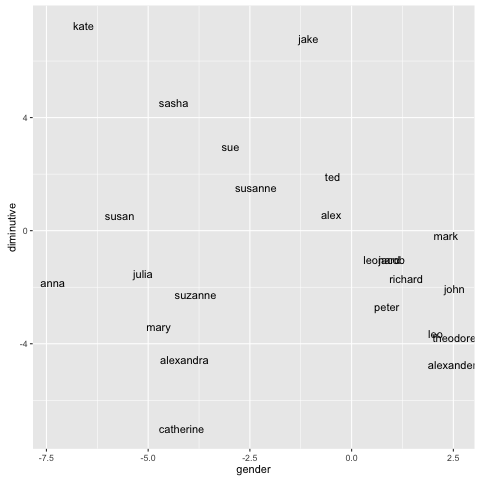

In [37]:
%%R -i df_plot
library(ggplot2)

ggplot(df_plot, aes(gender, diminutive, label=name)) +
  geom_text()

In [ ]:
# długości

In [7]:
np.log10(df.dot(df.loc["the"]).apply(np.exp).sum())

11.356260465544525

In [16]:
(df.loc["the"]**2).sum()

24.679304155109861

In [8]:
np.log10(df.dot(df.loc["she"]).apply(np.exp).sum())

14.188905636459221

In [14]:
(df.loc["she"]**2).sum()

31.86334793456189

In [9]:
np.log10(df.dot(df.loc["jacob"]).apply(np.exp).sum())

7.997831890084389

In [13]:
(df.loc["jacob"]**2).sum()

17.238681823211998

In [10]:
np.log10(df.dot(df.loc["perpendicularly"]).apply(np.exp).sum())

8.1641383947182664

In [12]:
(df.loc["perpendicularly"]**2).sum()

13.741790563569547

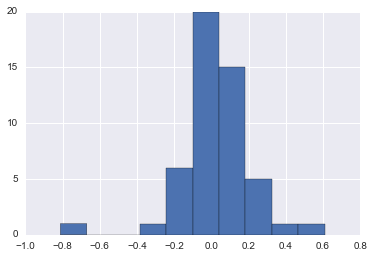

In [19]:
df.mean().hist()

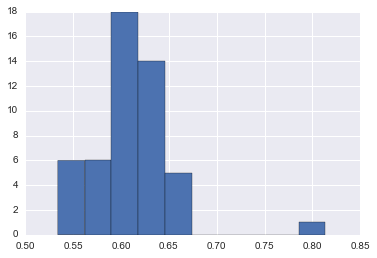

In [20]:
df.std().hist()